# TP MCMC 

Binôme :
 - LARIBI Hakima
 - OULD TALEB Nada

In [69]:
import numpy as np
import random
from scipy.integrate import quad  
import scipy.stats
import matplotlib.pyplot as plt 
%matplotlib inline

In [70]:
############Générer la marche aléatoire avec noyau gaussien####################
def MA_Gaussian(mu,sigma,teta):
    ## Générer la prochaine position de la marche
    return teta + random.gauss(mu,sigma)
        

In [71]:
################### Générer la proba d'acceptation #################
def alpha(teta,Y,mu,sigma):
    GY = 0.6*scipy.stats.norm.pdf(Y,0,1)*np.sqrt(2*np.pi) + 0.4 * scipy.stats.norm.pdf(Y,3,2)*np.sqrt(2*np.pi)*3
    Gteta = 0.6*scipy.stats.norm.pdf(teta,0,1)*np.sqrt(2*np.pi) + 0.4 * scipy.stats.norm.pdf(teta,3,2)*np.sqrt(2*np.pi)*3
    MA_Y = MA_Gaussian(mu,sigma,Y)
    MA_teta = MA_Gaussian(mu,sigma,teta)
    return (GY * MA_teta) / (Gteta * MA_Y) 

In [101]:
############ Algorithme de Metropolis Hasting #################
def MH(N,mu,sigma):
    ## Choisir un état initial Teta0 tel que g (teta0/y) > 0 
    G = -1
    while (G <= 0):
        teta0 = 100*(random.random())
        G = 0.6*scipy.stats.norm.pdf(teta0,0,1)*np.sqrt(2*np.pi) + 0.4 * scipy.stats.norm.pdf(teta0,3,2)*np.sqrt(2*np.pi)*3
        
    teta = teta0    
    
    for i in range(N):
        ## Générer Y(i) selon la proba de transition de la MA avec noyau gaussien
        Y =  MA_Gaussian(mu,sigma,teta)
        # Générer U qui suit une loi uniforme sur [0,1]
        U = np.random.uniform(0,1)
        
        if (U < min(1,alpha(teta,Y,mu,sigma))): #acceptation
            teta = Y
        else: #rejet
            teta = teta
    return teta

## 1- Tirer un échantillon de taille 5000 des deux distributions candidates N(0,1) et N(0,0.5)

In [73]:
##Tirer un échantillon de taille 5000 de la distribution à postériori G avec noyau de transition ~ N(0,1) 
T1 = np.zeros(5000)
ind1 = np.zeros(5000)
for i in range(5000):
    T1[i] = MH(50,0,1)
    ind1[i] = i

        
##Tirer un échantillon de taille 5000 de la distribution à postériori G avec noyau de transition ~ N(0,0.5)     
T2 = np.zeros(5000)
ind2 = np.zeros(5000)
for i in range(5000):
    T2[i] = MH(50,0,0.5)
    ind2[i] = i
     

In [74]:
#Afficher le déplacement de téta dans l'espace des paramètre avec une loi candidate de noyau N(0,1)
print("Echantillon de 100 éléments de la loi candidate N(0,1)")
print(T1[:100])
print()
print()
print()
#Afficher le déplacement de téta dans l'espace des paramètre avec une loi candidate de noyau N(0,0.5)
print("Echantillon de 100 éléments de la loi candidate N(0,0.5)")
print(T2[:100])

Echantillon de 100 éléments de la loi candidate N(0,1)
[54.72937196 45.13177857 27.97929379 19.06330033 28.15442953  8.00265278
  6.02105244 44.03824315 42.12288052 42.37383866 20.75355071 11.57837053
  2.83810947 20.60762267  8.474542   19.99842191 37.91047928 45.82442086
 32.52766719 -0.27265884  2.24877216 49.61021314  2.63594263  0.20829575
 58.75041212 45.26663354 19.1848548   2.26452196 34.03205756  7.97108597
 24.88047584 48.54593176 40.30648946 48.78910907 32.99536915 20.72415246
 55.36467839  0.17272244 56.89460835  7.6039249  28.57870304  6.32197791
 55.50319874  0.76444786  1.17585016 51.00284584  7.44634082 10.43686088
 46.62791779 56.08713335 22.85105008 23.75809174 35.70378192  2.56911076
 54.25482321 45.2993625  51.48289122  9.92035395 45.53007064  5.68754274
 11.51518014  3.06142728 48.88259977 28.43120943 31.26844243 25.90633282
 52.46782573 57.51868935 38.67970026 36.17020253 17.36102057 46.37754229
 26.39013015 55.00566075 27.91031175 -0.2027762   9.79599727  4.73901

## 2- Commenter la façon avec laquelle les deux chaînes se déplacent dans l’espace des paramètres
On remarque qu'avec les deux lois, les paramètres varient approximativement de la même même si ils prennent des valeurs légèrement plus grande pour le noyau N(0,0.5) qui vont jusqu'à 75.

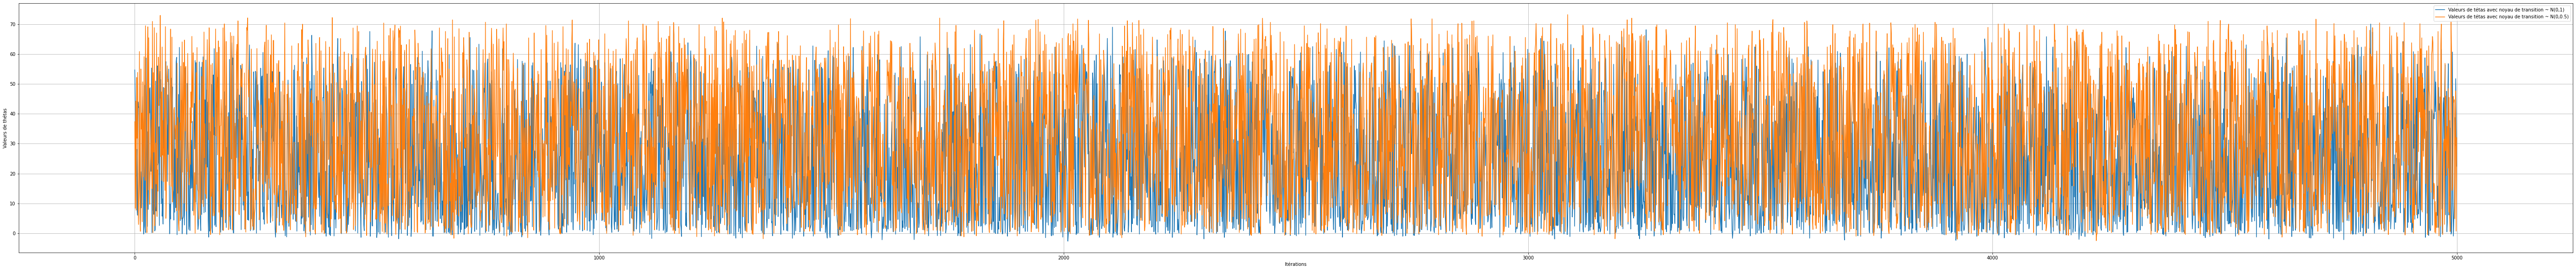

In [75]:
##Comparaison du déplacement des deux chaines dans l'espace des paramètres

fig, ax = plt.subplots(figsize=(100, 10))    
ax.plot(ind1,T1, label='Valeurs de tétas avec noyau de transition ~ N(0,1)')
ax.plot(ind2,T2, label='Valeurs de tétas avec noyau de transition ~ N(0,0.5)')
ax.legend()
plt.xlabel('Itérations')
# naming the y-axis
plt.ylabel('Valeurs de thétas')
plt.legend()
plt.grid(True)
plt.show()
    



## 3- Histogramme de chacun des deux échantillons avec N(0,1) et N(0,0.5)

In [76]:
##Génération la distribution G
T  = np.zeros(5000)
for i in range(5000):
    ## Générer U1, U2 qui suivent une loi uniforme sur [0,1]
    U1 = np.random.uniform(0,1)
    U2 = np.random.uniform(0,1)

    ## Générer N1 et N2 avec la méthode de l'inverse
    N1= np.sqrt(-2*(np.log(U1)))
    N2 = np.sqrt(-2*(np.log(U2)))*2+3
    
    ##Générer U ~ une loi uniforme sur [0,1]
    U = np.random.uniform(0,1)
    if (U<0.4):
        T[i] = N2
    else:
        T[i] = N1
        

Ici on va visualiser la distribution de la loi G 

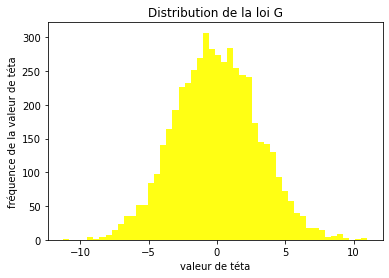

In [87]:
ind = np.zeros(5000)
for i in range(5000):
    ind[i] = i
    #print(T[i])
    
plt.hist(T, bins=50,color='#ffff14')

# Label axes
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution de la loi G")
plt.show()

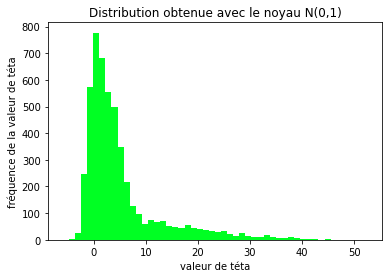

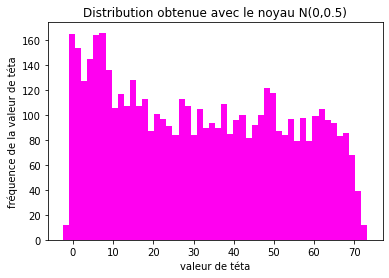

In [90]:
## Histogramme des distributions 

#Avec noyau ~ N(0,1)

ind1 = np.zeros(5000)
for i in range(5000):
    #T1[i] = MH(50,0,1)
    ind1[i] = i
    #print(T[i])
    
plt.hist(T1, bins=50, color='#00FF23')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution obtenue avec le noyau N(0,1)")
plt.show()


#Avec noyau ~ N(0,0.5)
ind2 = np.zeros(5000)
for i in range(5000):
    #T2[i] = MH(50,0,0.5)
    ind2[i] = i
    #print(T[i])
    
plt.hist(T2, bins=50, color='#FF00F0')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution obtenue avec le noyau N(0,0.5)")
plt.show()

Nous allons maintenant comparer les deux distributions résultantes avec respectivement la distribution candidate de noyau N(0,1) et de noyau N(0,0.5) avec la distribution de la loi G

### 3.1 Avec le noyau N(0,1) 

La distribution résultante couvre plus que le domaine de la distribution G, effectivement,la distribution G varie dans l'intervalle [0,10] tandisque la dsitribution résultante varie dans [0,50], par ailleurs, l'intervalle [0,10] est celui ayant la plus grande probabilité d'apparition dans la distribution résultante et plus particulièrement le voisinage de 0 qui apparait avec la plus grande probabilité exactement comme dans la distribution G. Pour résumer, on peut dire que la distribution candidate avec noyau N(0,1) ressemble à la distribution de base G.


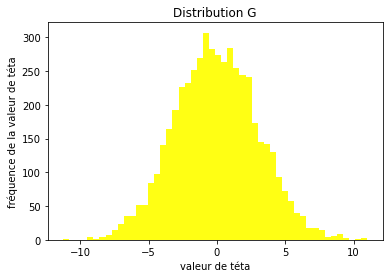

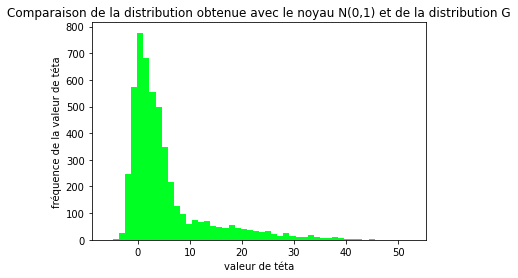

In [91]:
plt.hist(T, bins=50,color='#ffff14')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution G")
plt.show()

plt.hist(T1, bins=50, color='#00FF23')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Comparaison de la distribution obtenue avec le noyau N(0,1) et de la distribution G")
plt.show()

### 3.2 Avec le noyau N(0,0.5) 

De la même manière qu'avant, on remarque que la distribution résultante couvre un plus grand domaine [0,70] que celui de la distrubution G [0,10], le voisinage de 0 a toujours la plus grande probabilité d'apparition mais elle reste moins intense que celle obtenue avec la distribution G ou le noyau N(0,1), en effet, elle avoisine les 0.03 tandis qu'elle est égale à 0.08 avec la distribution G. De plus, le domaine non inclus dans la distrubution G [10,70] apparait dans la distribution résultante avec une assez grande probabilité ce qui n'est pas représentatif de la loi G. Pour résumer, on peut dire que le noyau N(0,0.5) peut être utilisé pour représenter la distribution G étant donné qu'il couvre tout le domaine dans lequel elle varie,  mais il reste beaucoup moins bien que le noyau N(0,1)

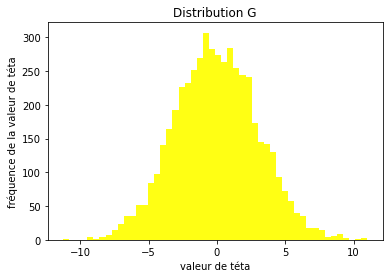

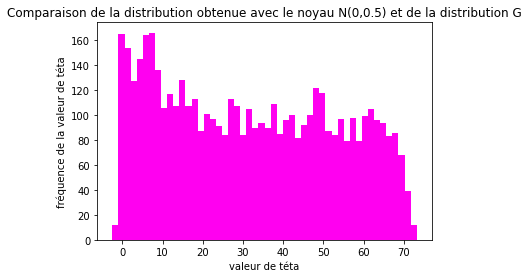

In [92]:
plt.hist(T, bins=50,color='#ffff14')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution G")
plt.show()

plt.hist(T2, bins=50, color='#FF00F0')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Comparaison de la distribution obtenue avec le noyau N(0,0.5) et de la distribution G")
plt.show()

## 4- Montrer qu’une densité candidate indépendante normale N (0,3) dominera la cible

Il est facile de remarquer la limite de G / N(0,3) vers l'infini tend vers 0. 
Effectivement, Lim G / N(0,3) ~ exp(-teta²) ~ 0

Donc, la loi N(0,3) domine la loi cible à l'infini.

## 5- Tirer un échantillon de taille 5000 des deux distributions candidates N(0,2) et N(0,3)

In [94]:
#Tirer un échantillon de 5000 de la distribution a posteriori, en utilisant l’algorithme de Metropolis-Hastings, avec N(0,2)
T3 = np.zeros(5000)
ind3 = np.zeros(5000)
for i in range(5000):
    T3[i] = MH(50,0,2)
    ind3[i] = i
    #print(T[i])
    
#Tirer un échantillon de 5000 de la distribution a posteriori, en utilisant l’algorithme de Metropolis-Hastings, avec N(0,3)
T4 = np.zeros(5000)
ind4 = np.zeros(5000)
for i in range(5000):
    T4[i] = MH(50,0,3)
    ind4[i] = i
    #print(T[i])


## 6- Commenter la façon avec laquelle les deux chaînes se déplacent dans l’espace des paramètres

On remarque que le paramètre téta varie dans l'intervalle [0,40] pour le noyau N(0,3) et dans l'intervalle [0,50] pour le noyau N(0,2). On remarque également que les valeurs du paramètre téta sont accentuées dans l'intervalle [0,10] pour le noyau N(0,3) tandis qu'elles sont propagées dans tout l'intervalle [0,50] pour le noyau N(0,2).

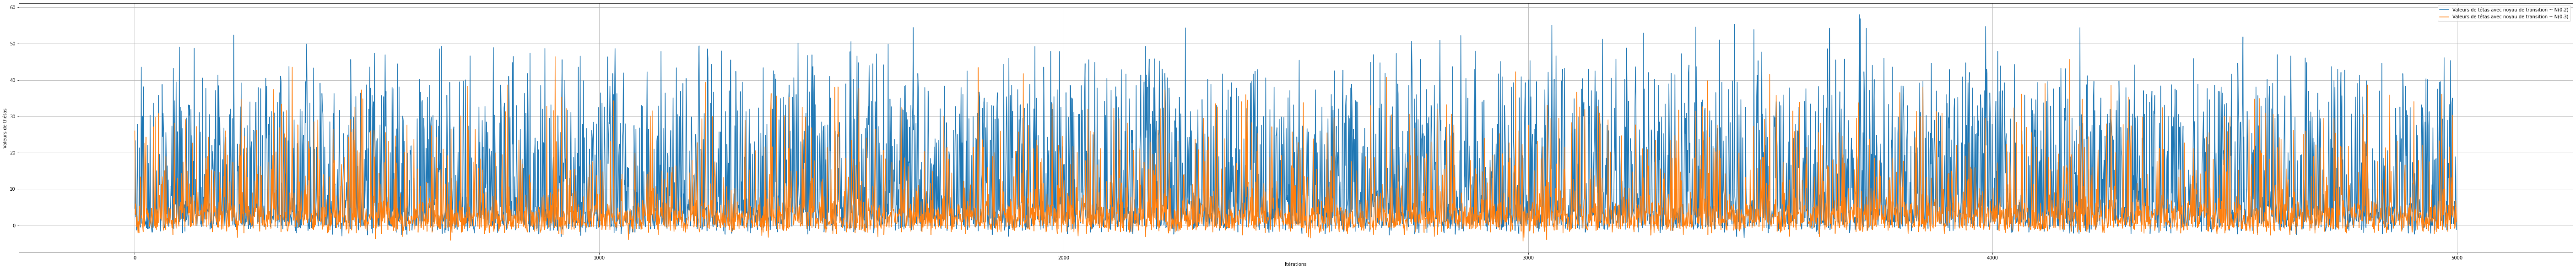

In [95]:
##Comparaison du déplacement des deux chaines dans l'espace des paramètres

fig, ax = plt.subplots(figsize=(100, 10))    
ax.plot(ind1,T3, label='Valeurs de tétas avec noyau de transition ~ N(0,2)')
ax.plot(ind2,T4, label='Valeurs de tétas avec noyau de transition ~ N(0,3)')
ax.legend()
plt.xlabel('Itérations')
# naming the y-axis
plt.ylabel('Valeurs de thétas')
plt.legend()
plt.grid(True)
plt.show()
    


## 7- Histogramme de chacun des deux échantillons avec N(0,2) et N(0,3)

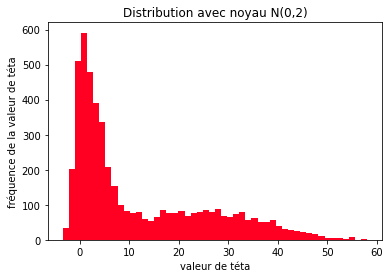

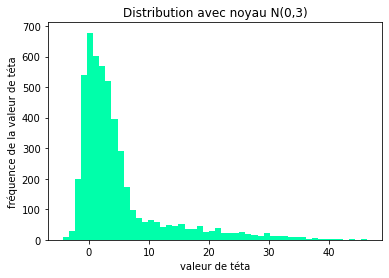

In [98]:
##Histogramme des distributions 

#Avec noyau ~ N(0,2)
ind3 = np.zeros(5000)
for i in range(5000):
    ind3[i] = i
    
plt.hist(T3, bins=50,color='#FF0023')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution avec noyau N(0,2)")
plt.show()

#Avec noyau ~ N(0,3)
ind4 = np.zeros(5000)
for i in range(5000):
    ind4[i] = i    
plt.hist(T4, bins=50,color='#00FFAA')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution avec noyau N(0,3)")
plt.show()

Nous allons maintenant comparer les deux distributions résultantes avec respectivement la distribution candidate de noyau N(0,2) et de noyau N(0,3) avec la distribution de la loi G

### 7.1 Avec noyau N(0,2)

On remarque que la distribution avec noyau N(0,2) couvre un plus grand domaine que celui de la distribution G. En effet, la distribution G varie dans l'intervalle [0,10] tandis que la distribution obtenue avec noyau N(0,2) varie dans l'intervalle [0,60] avec des probabilités faibles pour l'intervalle [10,60] qui avoisinent les 0.016 et une probabilité grande pour l'intervalle [0,10] particulièrement au voisinage de 0 exactement comme la distribution G. Pour résumer, les réalisation obtenues avec le noyau N(0,2) ressemblent à celles de G mais restent néanmoins plus ou moins différentes.

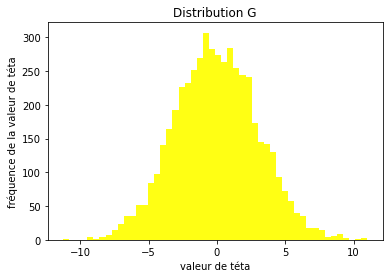

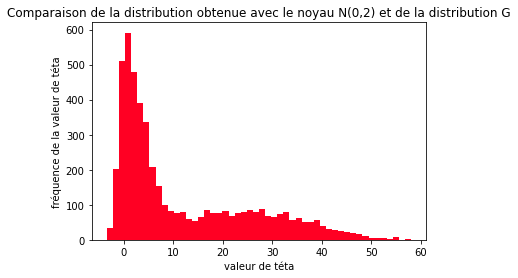

In [99]:
plt.hist(T, bins=50,color='#ffff14')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution G")
plt.show()

plt.hist(T3, bins=50, color='#FF0023')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Comparaison de la distribution obtenue avec le noyau N(0,2) et de la distribution G")
plt.show()

### 7.1 Avec noyau N(0,3)

On remarque que la distribution avec noyau N(0,3) couvre un plus grand domaine que celui de la distribution G. En effet, la distribution G varie dans l'intervalle [0,10] tandis que la distribution obtenue avec noyau N(0,3) varie dans l'intervalle [0,40] avec des probabilités très faibles pour l'intervalle [10,40] qui avoisinent le 0 et une probabilité grande pour l'intervalle [0,10] particulièrement au voisinage de 0 exactement comme la distribution G. Cette distribution représente correctement le comportement de la distribution G car on voit que les régions avec une intense probabilité sont similaires. On peut donc en conclure que si une distribution domine la distribution cible, alors celle-ci serait idéale pour la générer avec MH.

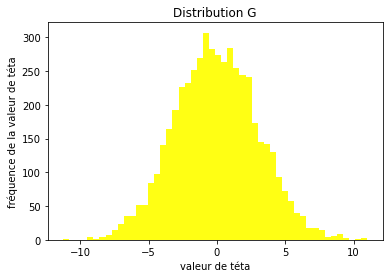

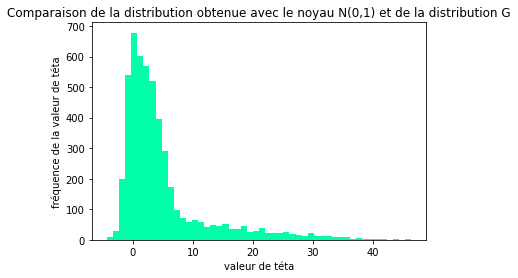

In [100]:
plt.hist(T, bins=50,color='#ffff14')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Distribution G")
plt.show()

plt.hist(T4, bins=50, color='#00FFAA')
plt.xlabel('valeur de téta')
plt.ylabel('fréquence de la valeur de téta')
plt.title("Comparaison de la distribution obtenue avec le noyau N(0,1) et de la distribution G")
plt.show()